# Exercise 0 - uppvärmning med riket
a) Börja med att läsa in filen riket2023_åk9_np.xlsx och sheets för de olika ämnena. Ändra kolumnnamnen på
respektive dataframe så du får något liknande som nedan.

In [15]:
import pandas as pd

df_riket = pd.read_excel(
    "../Laboration2/Data/riket2023_åk9_np.xlsx", sheet_name=None, skiprows=8
)
sheets = ["Engelska", "Matematik", "Svenska", "Svenska som andraspråk"]

# Function to rename column names
def rename_columns(df):
    df.columns = [
        "Plats",
        "Huvudman",
        "Totalt (A-F)",
        "Flickor (A-F)",
        "Pojkar (A-F)",
        "Totalt (A-E)",
        "Flickor (A-E)",
        "Pojkar (A-E)",
        "Totalt (poäng)",
        "Flickor (poäng)",
        "Pojkar (poäng)",
    ][: len(df.columns)]
    return df

# If sheet_name is in sheets column name is changed on each sheet and DataFrame
for sheet_name, df in df_riket.items():
    if sheet_name in sheets:
        df_riket[sheet_name] = rename_columns(df)

b) Ta reda på antalet som fått F i matematik totalt, pojkar respektive flickor.

In [16]:
def calculate_f_grade(df, total_column, girls_column, boys_column):
    # Extract percentage of girls with grades A-E
    girls_percentage = float(str(df.iloc[0][girls_column]).replace(",", "."))
    # Extract total number of girls with grades A-F
    total_girls_a_f = int(df.iloc[0][girls_column.replace("(A-E)", "(A-F)")])
    # Calculate number of girls with grade F
    girls_f = int((100 - girls_percentage) / 100 * total_girls_a_f)

    total_percentage = float(str(df.iloc[0][total_column]).replace(",", "."))
    total_students_a_f = int(df.iloc[0][total_column.replace("(A-E)", "(A-F)")])
    total_f = int((100 - total_percentage) / 100 * total_students_a_f)

    boys_percentage = float(str(df.iloc[0][boys_column]).replace(",", "."))
    total_boys_a_f = int(df.iloc[0][boys_column.replace("(A-E)", "(A-F)")])
    boys_f = int((100 - boys_percentage) / 100 * total_boys_a_f)
    return girls_f, total_f, boys_f

# Access the "Matematik" DataFrame
df_math = df_riket["Matematik"]

# Calculate the number of total, boys, and girls students who received an F in mathematics
total_f, boys_f, girls_f = calculate_f_grade(df_math, "Totalt (A-E)", "Pojkar (A-E)", "Flickor (A-E)")

print("Total number of students who received an F in mathematics:", total_f)
print("Number of boys who received an F in mathematics:", boys_f)
print("Number of girls who received an F in mathematics:", girls_f)

Total number of students who received an F in mathematics: 5797
Number of boys who received an F in mathematics: 11637
Number of girls who received an F in mathematics: 5824


c) Rita ett stapeldiagram på totala poängen för de olika ämnena.

- Jag hade problem när jag skulle plotta denna graf pågrund av Rapportbeskrivning och def. Jag fick lägga in en if-sats som kontrollerar att subject inte är Rapportbeskrivning och def och en except med ValueError och KeyError. Detta gör att Rapportbeskrivning och def inte ingår i listan av ämnen som används för att skapa grafen.

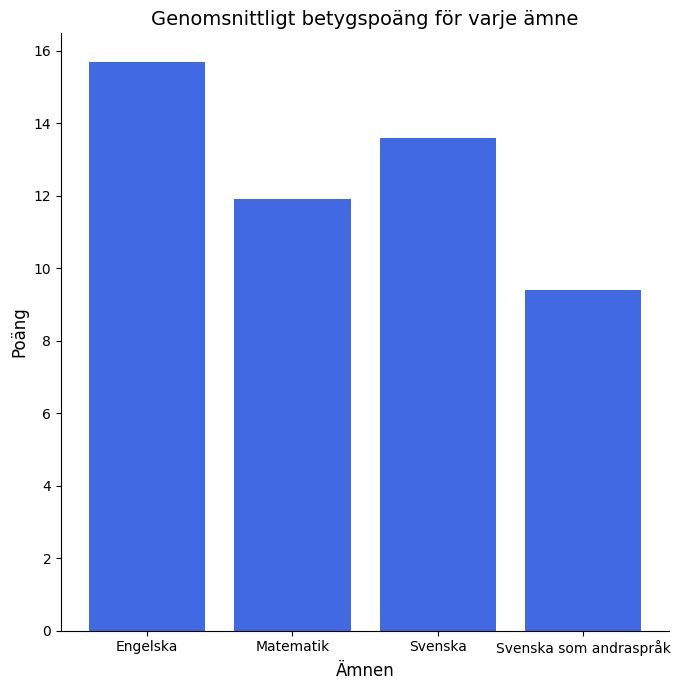

In [55]:
import matplotlib.pyplot as plt

def plot_total_points(df_dict):
    subjects = list(df_dict.keys())
    total_points = []

    for subject in subjects:
        # Ignore the last sheet "Rapportbeskrivning och def"
        if subject != "Rapportbeskrivning och def.":
            try:
                # Extract total point from DataFrame for specific subject
                total_point = float(df_dict[subject].loc[0]["Totalt (poäng)"])
                total_points.append(total_point)
            except (ValueError, KeyError):
                # If column doesn't exist or the value can't convert to float. Set value to 0.
                total_points.append(0)  

    plt.figure(figsize=(7, 7))
    # Ignore last sheet
    plt.bar(subjects[:-1], total_points, color="royalblue")  
    plt.title("Genomsnittligt betygspoäng för varje ämne", fontsize=14)
    plt.xlabel("Ämnen", fontsize=12)
    plt.ylabel("Poäng", fontsize=12)
    plt.gca().spines[["top", "right"]].set_visible(False)
    plt.xticks(rotation=0)
    plt.tight_layout(rect=[0, 0, 1, 1])
    plt.show()

plot_total_points(df_riket)

d) Rita fyra olika stapeldiagram i subplots på totala poängen för de olika ämnena för de olika huvudmännen.

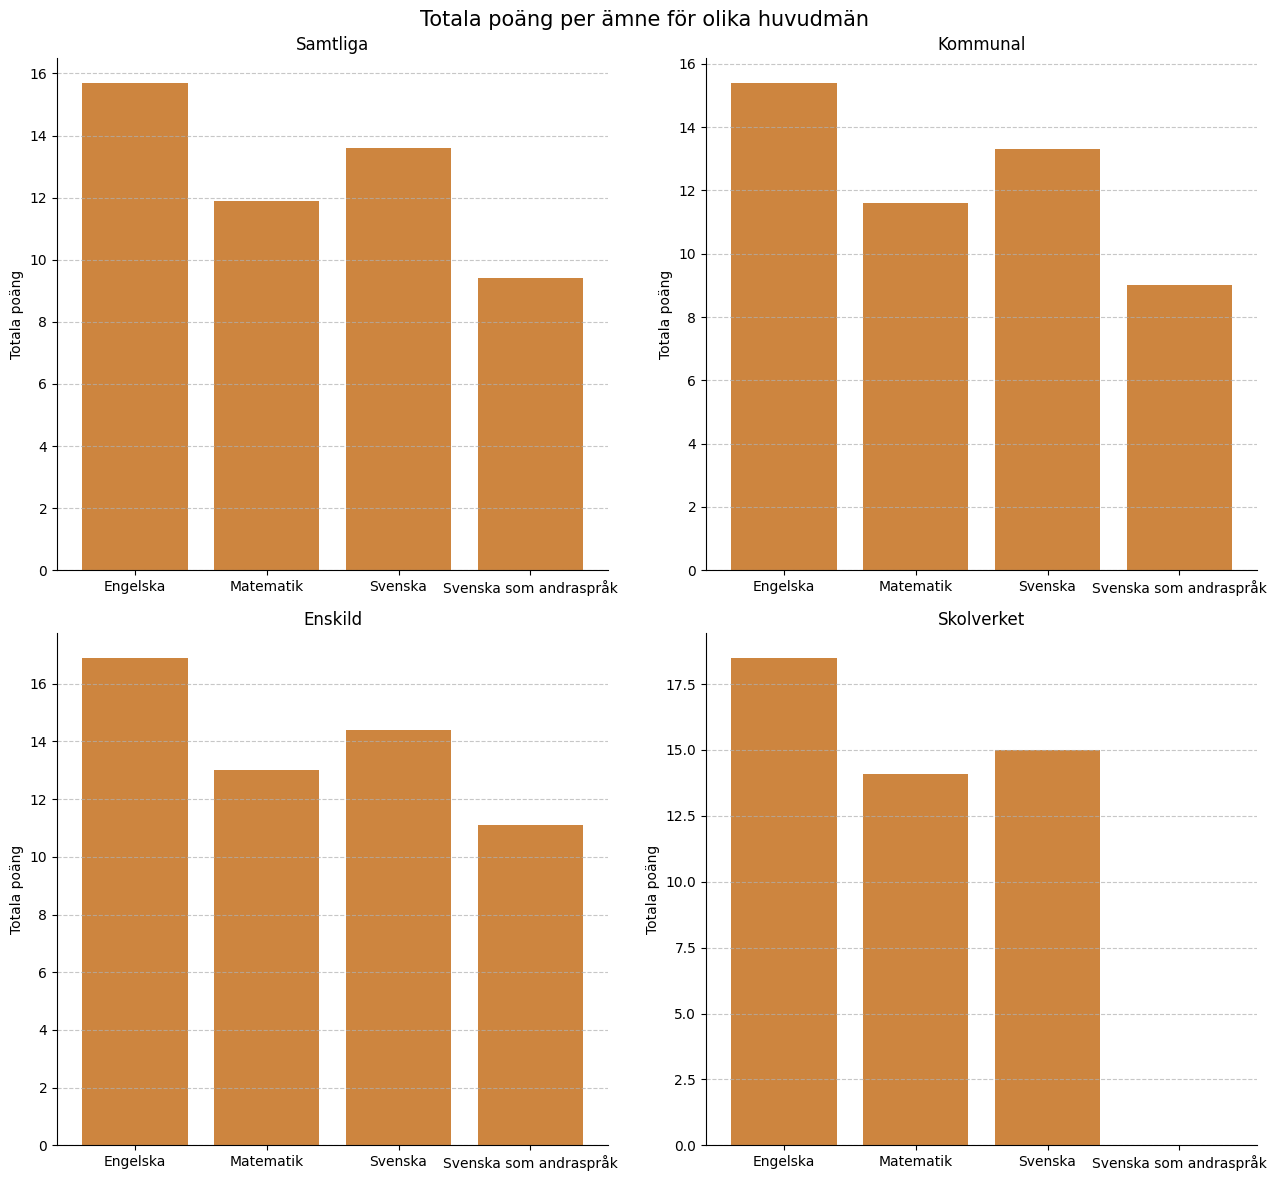

In [18]:
import matplotlib.pyplot as plt

def plot_subplots(df_dict):
    subjects = list(df_dict.keys())
    principals = df_dict[subjects[0]]["Huvudman"].unique()
    
    fig, axes = plt.subplots(2, 2, figsize=(13, 12))
    fig.suptitle("Totala poäng per ämne för olika huvudmän", fontsize=15)
    
    for i, h in enumerate(principals):
        total_points = []
        for subject in subjects:
            if subject != "Rapportbeskrivning och def.":
                try:
                    df_huvudman = df_dict[subject][df_dict[subject]["Huvudman"] == h]
                    total_point = float(df_huvudman.iloc[0]["Totalt (poäng)"])
                    total_points.append(total_point)
                except (ValueError, KeyError, IndexError):
                    total_points.append(0)
        
        row = i // 2
        col = i % 2
        
        axes[row, col].bar(subjects[:-1], total_points, color="peru")
        axes[row, col].set_title(f'{h}')
        axes[row, col].set_ylabel("Totala poäng")
        axes[row, col].grid(axis="y", linestyle="--", alpha=0.7)
        axes[row, col].tick_params(axis="x", rotation=0)
        axes[row, col].spines[["top", "right"]].set_visible(False)

    plt.tight_layout(rect=[0, 0, 1, 1])
    plt.show()

plot_subplots(df_riket)

# Uppgift 1 - uppvärmning betyg och prov
a) Rita ett linjediagram för andel elever som saknar godkänt betyg i ett eller fler ämnen för läsår 18-23. Ta med totalt,
flickor och pojkar i samma graf.

In [19]:
import plotly.express as px
import pandas as pd

sheet = "Tabell 1B"
df_grades = pd.read_excel("../Laboration2/Data/betyg_o_prov_riksnivå.xlsx", sheet_name=sheet, skiprows=7)

# Rename column names
rename_column = [
    "Läsår/Huvudman/Bakgrund",
    "Totalt (16 ämnen)",
    "Flickor (16 ämnen)",
    "Pojkar (16 ämnen)",
    "Totalt (17 ämnen)",
    "Flickor (17 ämnen)",
    "Pojkar (17 ämnen)",
    "Totalt (saknar godkänt)",
    "Flickor (saknar godkänt)",
    "Pojkar (saknar godkänt)"
]

df_grades.columns = rename_column

In [20]:
fig = px.line(
    # Include only the first five rows
    df_grades.head(5),
    x="Läsår/Huvudman/Bakgrund",
    y=[
        "Totalt (saknar godkänt)",
        "Flickor (saknar godkänt)",
        "Pojkar (saknar godkänt)"
    ],
    labels={"value": "Andel som saknar godkänt (%)", "variable": "Kategori"},
    title="Andel elever som saknar godkänt betyg per läsår",
    markers=True
)  # Lägger till markörer för datapunkter

# Uppdatera diagrammet med lämpliga axeltitlar och möjligtvis anpassa utseendet
fig.update_layout(
    xaxis_title="Läsår", yaxis_title="Andel (%)", xaxis=dict(tickmode="linear")
)
fig.show()

b) Rita ett linjediagram för meritvärde för 16 ämnen för totalt, flickor och pojkar för läsår 18-23

In [21]:
fig = px.line(
    df_grades.head(5),
    x="Läsår/Huvudman/Bakgrund",
    y=[
        "Totalt (16 ämnen)",
        "Flickor (16 ämnen)",
        "Pojkar (16 ämnen)"
    ],
    labels={"value": "Genomsnittligt meritvärde beräknat på 16 ämnen", "variable": "Kategori"},
    title="Genomsnittligt meritvärde beräknat på 16 ämnen",
    markers=True
)
fig.update_layout(
    xaxis_title="Läsår", yaxis_title="Meritvärde", xaxis=dict(tickmode="linear")
)
fig.show()

 c) Undersök nu andra variabler, och hur de påverkar meritvärde och andel med minst ett saknat betyg. Data finns för
läsår 22/23. Exempel kan man undersöka föräldrarnas utbildningsbakgrund. Rita lämpliga grafer.

In [28]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import pandas as pd

# Anta att df_grades är din DataFrame som redan har korrekta kolumner efter att ha läst in data och ändrat kolumnnamn

def filter_data(df, education_levels, value_column):
    """Filter data based on education level and value column."""
    return df[df["Läsår/Huvudman/Bakgrund"].isin(education_levels)][["Läsår/Huvudman/Bakgrund", value_column]]

def create_bar_chart(df, category_column, value_column):
    """Create a bar chart trace for the given dataframe."""
    return go.Bar(x=df[category_column], y=df[value_column])

# Ange vilka utbildningsnivåer som ska inkluderas i plotten
education_levels = [
    "Förgymnasial utbildning", 
    "Gymnasial utbildning", 
    "Eftergymnasial utbildning"
]

# Skapa subplotter med två kolumner
fig = make_subplots(rows=1, cols=2, subplot_titles=("Genomsnittligt meritvärde för flickor", "Andel flickor som saknar godkänt"))

# Lägg till subplot för genomsnittliga meritvärden
df_avg_grades = filter_data(df_grades, education_levels, "Flickor (16 ämnen)")
avg_grades_chart = create_bar_chart(df_avg_grades, "Läsår/Huvudman/Bakgrund", "Flickor (16 ämnen)")
fig.add_trace(avg_grades_chart, row=1, col=1)

# Lägg till subplot för andel flickor som saknar godkänt
df_lacking_grades = filter_data(df_grades, education_levels, "Flickor (saknar godkänt)")
lacking_grades_chart = create_bar_chart(df_lacking_grades, "Läsår/Huvudman/Bakgrund", "Flickor (saknar godkänt)")
fig.add_trace(lacking_grades_chart, row=1, col=2)

fig.update_layout(title_text="Analys av Meritvärden och Godkända Betyg", height=600, width=1000)

fig.show()